**1. Data Understanding**

In [ ]:
import pandas as pd

#Data Understanding
# Load the dataset
data = pd.read_excel('/content/Data in Brief.xlsx')
data.head()


,Name,Filing Date,Sued,Sued (including acquirer class actions),Head-quarter,Circuit,StandingDenied,Listed,Industry,NonBiz,Types of Data Breach,Hacking,Payment,CreditMonitor,pre-Clapper,post-Spokeo,Injured,LogInjured
0,"International Association of Sheet Metal, et al.",2016-12-30,0,0,PA,3,1.0,0,Nonprofit,1,disclosure,0,0,1.0,0,1,NaN,NaN
1,Graphik Dimensions Ltd.,2016-12-28,0,0,NC,4,1.0,0,eCommerce,0,hacking,1,0,0.0,0,1,NaN,NaN
2,"The Topps Company, Inc.",2016-12-27,0,0,NY,2,1.0,0,eCommerce,0,hacking,1,0,1.0,0,1,NaN,NaN
3,FriendFinder Networks Inc.,2016-12-23,0,0,CA,9,0.0,0,Online,0,hacking,1,0,0.0,0,1,412214295.0,8.615123
4,Claremont University Consortium,2016-12-22,0,0,CA,9,0.0,0,Education,1,theft/burglary,0,0,1.0,0,1,NaN,NaN


In [ ]:
# Find the Distribution of Data Breach (DDB)
DDB = data['Types of Data Breach'].value_counts()
DDB

,count
Types of Data Breach,
hacking,322
theft/burglary,127
transfer,71
disclosure,60
payment,55
insider,46
phishing,36
loss,22
no info/others,9


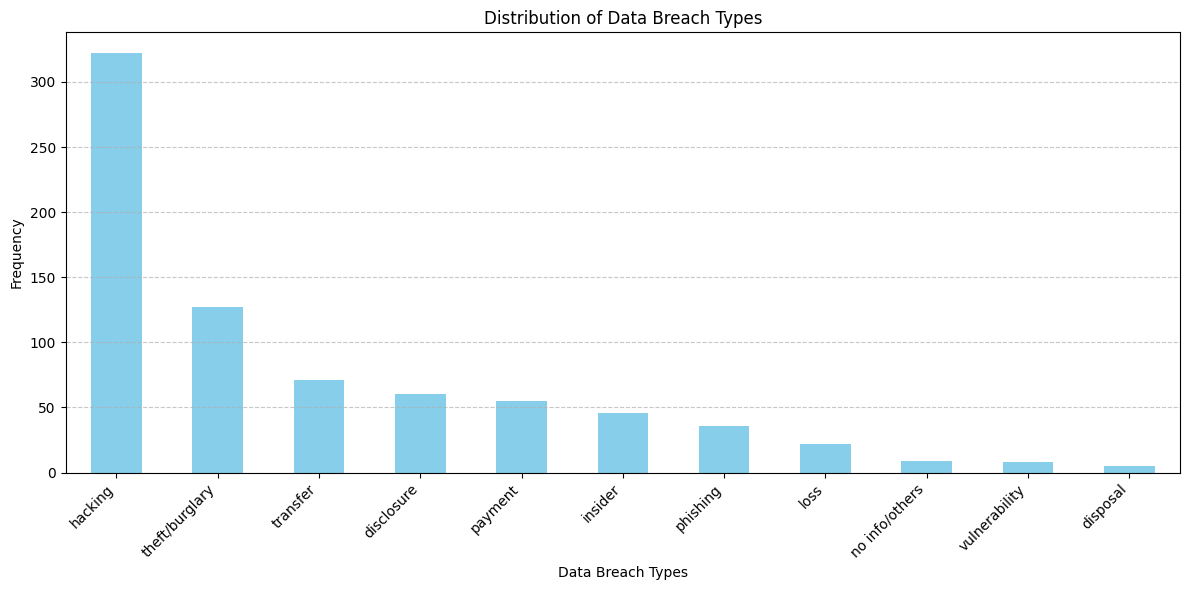

In [ ]:
#Exploration Data Analysis (EDA)

import matplotlib.pyplot as plt

# Plot the distribution of the 'Types of Data Breach' column - Target Variable
plt.figure(figsize=(12, 6))
DDB.plot(kind='bar', color='skyblue')
plt.title('Distribution of Data Breach Types')
plt.xlabel('Data Breach Types')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



In [ ]:
# Display basic information about the dataset
DataInfo = data.info()

DataDescription = data.describe(include='all')

DataInfo, DataDescription

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 761 entries, 0 to 760
Data columns (total 18 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Name                                     761 non-null    object 
 1   Filing Date                              761 non-null    object 
 2   Sued                                     761 non-null    int64  
 3   Sued (including acquirer class actions)  761 non-null    int64  
 4   Head-quarter                             761 non-null    object 
 5   Circuit                                  756 non-null    object 
 6   StandingDenied                           756 non-null    float64
 7   Listed                                   761 non-null    int64  
 8   Industry                                 761 non-null    object 
 9   NonBiz                                   761 non-null    int64  
 10  Types of Data Breach                     761 non-n

(None,
                                                Name Filing Date        Sued  \
 count                                           761         761  761.000000   
 unique                                          731         557         NaN   
 top     Massachusetts Mutual Life Insurance Company  2016-05-05         NaN   
 freq                                              5           5         NaN   
 mean                                            NaN         NaN    0.073587   
 std                                             NaN         NaN    0.261270   
 min                                             NaN         NaN    0.000000   
 25%                                             NaN         NaN    0.000000   
 50%                                             NaN         NaN    0.000000   
 75%                                             NaN         NaN    0.000000   
 max                                             NaN         NaN    1.000000   
 
         Sued (including acquir

**2. Data Preparation**

In [ ]:
# Checking for missing values
MissingValues = data.isnull().sum()

# Display the missing values
MissingValues


,0
Name,0
Filing Date,0
Sued,0
Sued (including acquirer class actions),0
Head-quarter,0
Circuit,5
StandingDenied,5
Listed,0
Industry,0
NonBiz,0


In [ ]:
#Handling Missing Values
# Fill missing values for 'Circuit' and 'StandingDenied' with their respective modes
data['Circuit'].fillna(data['Circuit'].mode()[0], inplace=True)
data['StandingDenied'].fillna(data['StandingDenied'].mode()[0], inplace=True)

# Drop columns 'Injured' and 'LogInjured'
data.drop(columns=['Injured', 'LogInjured'], inplace=True)

# Check for remaining missing values
MissingValuesAfter = data.isnull().sum()

# Display the remaining missing values
MissingValuesAfter


,0
Name,0
Filing Date,0
Sued,0
Sued (including acquirer class actions),0
Head-quarter,0
Circuit,0
StandingDenied,0
Listed,0
Industry,0
NonBiz,0


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encoding  of the 'Head-quarter' and 'Industry' variables
LabelEncoder = LabelEncoder()
data['Head-quarter'] = LabelEncoder.fit_transform(data['Head-quarter'])
data['Industry'] = LabelEncoder.fit_transform(data['Industry'])

# show the first five rows with the encoded dataset
data.head()


,Name,Filing Date,Sued,Sued (including acquirer class actions),Head-quarter,Circuit,StandingDenied,Listed,Industry,NonBiz,Types of Data Breach,Hacking,Payment,CreditMonitor,pre-Clapper,post-Spokeo
0,"International Association of Sheet Metal, et al.",2016-12-30,0,0,35,3,1.0,0,5,1,disclosure,0,0,1.0,0,1
1,Graphik Dimensions Ltd.,2016-12-28,0,0,25,4,1.0,0,12,0,hacking,1,0,0.0,0,1
2,"The Topps Company, Inc.",2016-12-27,0,0,31,2,1.0,0,12,0,hacking,1,0,1.0,0,1
3,FriendFinder Networks Inc.,2016-12-23,0,0,2,9,0.0,0,6,0,hacking,1,0,0.0,0,1
4,Claremont University Consortium,2016-12-22,0,0,2,9,0.0,0,0,1,theft/burglary,0,0,1.0,0,1


**Data Preprocessing**


In [ ]:
#Preparation of the text data for RoBERTa Model
from transformers import RobertaTokenizer

# Set the RoBERTa tokenizer
Ro_Tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

# Tokenization of the text data
TokenizedText = Ro_Tokenizer(
    data['Types of Data Breach'].astype(str).tolist(),
    padding=True,
    truncation=True,
    return_tensors='pt'
)

# Show the first five tokenized examples
TokenizedText['input_ids'][:5]


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

tensor([[    0,  7779, 26085,     2,     1,     1,     1,     1],
        [    0,   298,  7361,     2,     1,     1,     1,     1],
        [    0,   298,  7361,     2,     1,     1,     1,     1],
        [    0,   298,  7361,     2,     1,     1,     1,     1],
        [    0,   627,  2543,    73,  3321,   462,  1766,     2]])

In [ ]:
import torch
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Convert other relevant features to numeric types before creating a tensor
for col in data.drop(columns=['Name', 'Filing Date', 'Types of Data Breach']).columns:
    if data[col].dtype == 'object':
        data[col] = data[col].astype(str).factorize()[0]  # Convert to numeric categories

# Convert 'Types of Data Breach' to numeric labels using LabelEncoder
LabelEncoder = LabelEncoder()  # Set the LabelEncoder
data['Types of Data Breach'] = LabelEncoder.fit_transform(data['Types of Data Breach'])

# Split the dataset into training and testing sets
TrainText, TestText, TrainLabel, TestLabel = train_test_split(
    data.drop(columns=['Name', 'Filing Date']),
    data['Types of Data Breach'].values,
    test_size=0.2,
    random_state=42
)

# Tokenization and encoding of the train and test set
TrainEncodings = Ro_Tokenizer(TrainText['Types of Data Breach'].astype(str).tolist(), padding=True, truncation=True, return_tensors='pt')
TestEncodings = Ro_Tokenizer(TestText['Types of Data Breach'].astype(str).tolist(), padding=True, truncation=True, return_tensors='pt')

# Conversion of features and labels into tensors
TrainFeature = torch.tensor(TrainText.drop(columns=['Types of Data Breach']).values)
TestFeature = torch.tensor(TestText.drop(columns=['Types of Data Breach']).values)
TrainLabel = torch.tensor(TrainLabel)
TestLabel = torch.tensor(TestLabel)

# Creation of TensorDatasets
TrainDataset = TensorDataset(TrainEncodings['input_ids'], TrainEncodings['attention_mask'], TrainFeature, TrainLabel)
TestDataset = TensorDataset(TestEncodings['input_ids'], TestEncodings['attention_mask'], TestFeature, TestLabel)

# Creation of the DataLoaders
BatchSize = 32
TrainDataloader = DataLoader(TrainDataset, batch_size=BatchSize, shuffle=True)
TestDataloader = DataLoader(TestDataset, batch_size=BatchSize, shuffle=False)


**3. Model Building**

In [ ]:
import torch
from torch.optim import AdamW
from transformers import RobertaForSequenceClassification

# Find the number of unique labels
NumLabel = len(torch.unique(TrainLabel))

# Set the RoBERTa model
model = RobertaForSequenceClassification.from_pretrained('roberta-base', num_labels=NumLabel)

# set an optimizer
optimizer = AdamW(model.parameters(), lr=2e-5)

# Model Training Loop
epochs = 3
model.train() #set model to training mode
for epoch in range(epochs):
    for batch in TrainDataloader:
        input_ids, attention_mask, features, labels = batch

        # Forward pass
        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()

        # Optimizer step
        optimizer.step()
        optimizer.zero_grad()

        print(f'Epoch {epoch}, Loss: {loss.item()}')

print("Training complete.")

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 0, Loss: 2.372046947479248
Epoch 0, Loss: 2.388422727584839
Epoch 0, Loss: 2.3350000381469727
Epoch 0, Loss: 2.318005323410034
Epoch 0, Loss: 2.347017765045166
Epoch 0, Loss: 2.24988055229187
Epoch 0, Loss: 2.148857831954956
Epoch 0, Loss: 2.270137071609497
Epoch 0, Loss: 2.0577831268310547
Epoch 0, Loss: 1.9360612630844116
Epoch 0, Loss: 1.8418172597885132
Epoch 0, Loss: 2.029729127883911
Epoch 0, Loss: 1.8979337215423584
Epoch 0, Loss: 1.8514814376831055
Epoch 0, Loss: 1.6670478582382202
Epoch 0, Loss: 1.7350369691848755
Epoch 0, Loss: 1.6916013956069946
Epoch 0, Loss: 1.4516758918762207
Epoch 0, Loss: 1.7608137130737305
Epoch 1, Loss: 1.6115715503692627
Epoch 1, Loss: 1.4111815690994263
Epoch 1, Loss: 1.6409980058670044
Epoch 1, Loss: 1.2322132587432861
Epoch 1, Loss: 1.2281415462493896
Epoch 1, Loss: 1.4166245460510254
Epoch 1, Loss: 1.1004984378814697
Epoch 1, Loss: 0.9734992384910583
Epoch 1, Loss: 1.1187822818756104
Epoch 1, Loss: 0.910749614238739
Epoch 1, Loss: 0.9943420

**4. Model Evaluation**

Accuracy: 0.9673
Precision: 0.9389
Recall: 0.9673
F1 Score: 0.9522


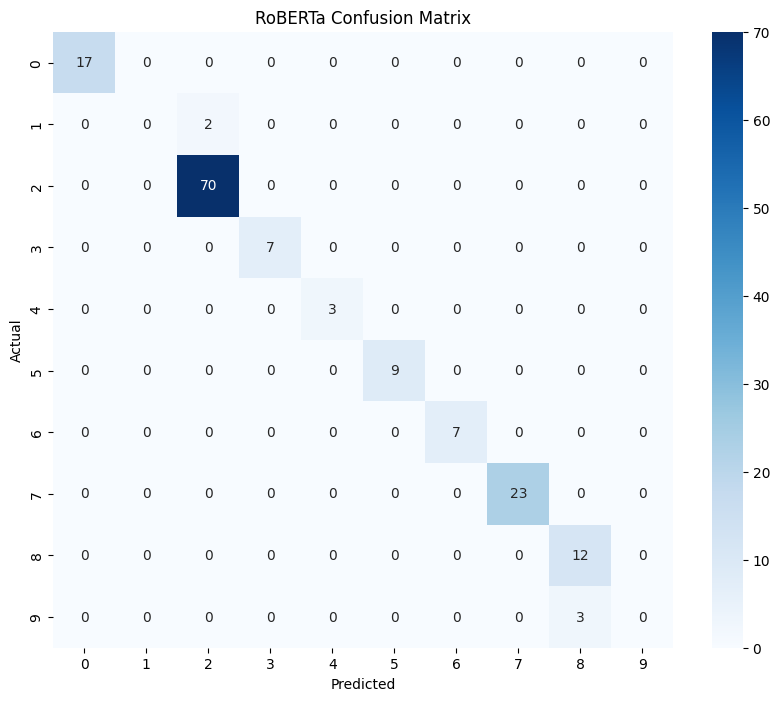

In [ ]:
import torch
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_model(model, TestEncodings, TestLabel):
    model.eval()
    with torch.no_grad():
        Outcome = model(input_ids=TestEncodings['input_ids'], attention_mask=TestEncodings['attention_mask'])
        Logit = Outcome.logits
        Prediction = torch.argmax(Logit, dim=-1)

    # Calculation of the metrics
    Accuracy = accuracy_score(TestLabel, Prediction)
    Precision = precision_score(TestLabel, Prediction, average='weighted', zero_division=0)
    Recall = recall_score(TestLabel, Prediction, average='weighted', zero_division=0)
    f1 = f1_score(TestLabel, Prediction, average='weighted')

    # Calculation of the confusion matrix
    ConfMatrix = confusion_matrix(TestLabel, Prediction)

    # Show the calculated metrics
    print(f'Accuracy: {Accuracy:.4f}')
    print(f'Precision: {Precision:.4f}')
    print(f'Recall: {Recall:.4f}')
    print(f'F1 Score: {f1:.4f}')

    # Plot confusion matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(ConfMatrix, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('RoBERTa Confusion Matrix')
    plt.show()

# Using the test set to evaluate the model
evaluate_model(model, TestEncodings, TestLabel)


**Applying SMOTE Technique to balance the Dataset**

In [ ]:
import torch
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

# Convert other relevant features to numeric types before creating a tensor
for col in data.drop(columns=['Name', 'Filing Date', 'Types of Data Breach']).columns:
    if data[col].dtype == 'object':
        data[col] = data[col].astype(str).factorize()[0]  # Convert to numeric categories

# Convert 'Types of Data Breach' to numeric labels using LabelEncoder
LabelEncoder = LabelEncoder()  #Set the LabelEncoder
data['Types of Data Breach'] = LabelEncoder.fit_transform(data['Types of Data Breach'])

# Split the dataset into training and testing sets
TrainText, TestText, TrainLabel, TestLabel = train_test_split(
    data.drop(columns=['Name', 'Filing Date']),
    data['Types of Data Breach'].values,
    test_size=0.2,
    random_state=42
)

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42,  k_neighbors=2)  # set k_neighbors
TrainText, TrainLabel = smote.fit_resample(TrainText, TrainLabel)

# Tokenization and encoding of the train and test set
TrainEncodings = Ro_Tokenizer(TrainText['Types of Data Breach'].astype(str).tolist(), padding=True, truncation=True, return_tensors='pt')
TestEncodings = Ro_Tokenizer(TestText['Types of Data Breach'].astype(str).tolist(), padding=True, truncation=True, return_tensors='pt')

# Conversion of features and labels into tensors
TrainFeature = torch.tensor(TrainText.drop(columns=['Types of Data Breach']).values)
TestFeature = torch.tensor(TestText.drop(columns=['Types of Data Breach']).values)
TrainLabel = torch.tensor(TrainLabel)
TestLabel = torch.tensor(TestLabel)

# Create TensorDatasets
TrainDataset = TensorDataset(TrainEncodings['input_ids'], TrainEncodings['attention_mask'], TrainFeature, TrainLabel)
TestDataset = TensorDataset(TestEncodings['input_ids'], TestEncodings['attention_mask'], TestFeature, TestLabel)

# Create DataLoaders
BatchSize = 32
TrainDataloader = DataLoader(TrainDataset, batch_size=BatchSize, shuffle=True)
TestDataloader = DataLoader(TestDataset, batch_size=BatchSize, shuffle=False)


**Model Retraining After Handling Class Imbalance using SMOTE Technique**

In [ ]:
#Model retraining after class imbalance using SMOTE
import torch
from torch.optim import AdamW
from transformers import RobertaForSequenceClassification

# Find the number of unique labels
NumLabels = len(torch.unique(TrainLabel))

# Set the RoBERTa model
model = RobertaForSequenceClassification.from_pretrained('roberta-base', num_labels=NumLabel)

# Set the optimizer
optimizer = AdamW(model.parameters(), lr=2e-5)

# Model Training Loop
epochs = 3
model.train() #set model to training mode
for epoch in range(epochs):
    for batch in TrainDataloader:
        input_ids, attention_mask, features, labels = batch

        # Forward pass
        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()

        # Optimizer step
        optimizer.step()
        optimizer.zero_grad()

        print(f'Epoch {epoch}, Loss: {loss.item()}')

print("Training complete.")

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 0, Loss: 2.3865227699279785
Epoch 0, Loss: 2.388435125350952
Epoch 0, Loss: 2.4146852493286133
Epoch 0, Loss: 2.397468090057373
Epoch 0, Loss: 2.40433669090271
Epoch 0, Loss: 2.3963868618011475
Epoch 0, Loss: 2.3717377185821533
Epoch 0, Loss: 2.3703200817108154
Epoch 0, Loss: 2.388979196548462
Epoch 0, Loss: 2.38283634185791
Epoch 0, Loss: 2.3743393421173096
Epoch 0, Loss: 2.3263654708862305
Epoch 0, Loss: 2.31760573387146
Epoch 0, Loss: 2.2663304805755615
Epoch 0, Loss: 2.209440231323242
Epoch 0, Loss: 2.1503689289093018
Epoch 0, Loss: 2.079540967941284
Epoch 0, Loss: 2.087092161178589
Epoch 0, Loss: 2.082293748855591
Epoch 0, Loss: 1.8880351781845093
Epoch 0, Loss: 1.8717864751815796
Epoch 0, Loss: 1.8337630033493042
Epoch 0, Loss: 1.6987959146499634
Epoch 0, Loss: 1.7457753419876099
Epoch 0, Loss: 1.477758765220642
Epoch 0, Loss: 1.4715603590011597
Epoch 0, Loss: 1.501114010810852
Epoch 0, Loss: 1.3655580282211304
Epoch 0, Loss: 1.3200534582138062
Epoch 0, Loss: 1.289671182632

Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000


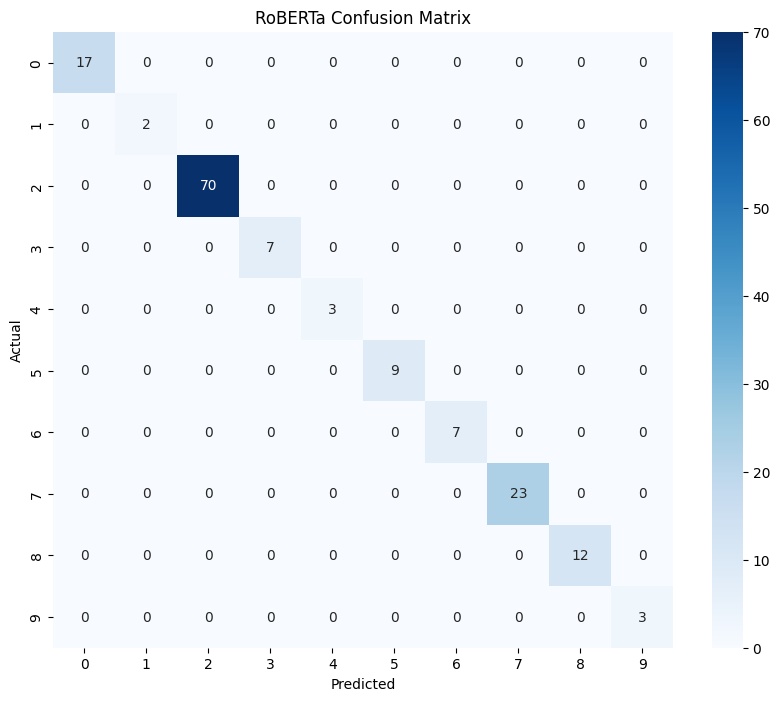

In [ ]:
#Model Re-evaluation

import torch
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_model(model, test_encodings, test_labels):
    model.eval()
    with torch.no_grad():
        Outcome = model(input_ids=test_encodings['input_ids'], attention_mask=test_encodings['attention_mask'])
        Logits = Outcome.logits
        Prediction = torch.argmax(Logits, dim=-1)

    # Calculation of the metrics
    Accuracy = accuracy_score(TestLabel, Prediction)
    Precision = precision_score(TestLabel, Prediction, average='weighted', zero_division=0)
    Recall = recall_score(TestLabel, Prediction, average='weighted', zero_division=0)
    f1 = f1_score(TestLabel, Prediction, average='weighted')

    # Calculate confusion matrix
    ConfMatrix = confusion_matrix(TestLabel, Prediction)

    # Show the calculated metrics
    print(f'Accuracy: {Accuracy:.4f}')
    print(f'Precision: {Precision:.4f}')
    print(f'Recall: {Recall:.4f}')
    print(f'F1 Score: {f1:.4f}')

    # Plot confusion matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(ConfMatrix, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('RoBERTa Confusion Matrix')
    plt.show()

# Evaluate the model on the test set
evaluate_model(model, TestEncodings, TestLabel)

In [ ]:
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# def evaluate_model(model, test_encodings, test_labels):
#     model.eval()
#     with torch.no_grad():
#         outputs = model(input_ids=test_encodings['input_ids'], attention_mask=test_encodings['attention_mask'])
#         logits = outputs.logits
#         predictions = torch.argmax(logits, dim=-1)

#     accuracy = accuracy_score(test_labels, predictions)
#     precision = precision_score(test_labels, predictions, average='weighted', zero_division=0)
#     recall = recall_score(test_labels, predictions, average='weighted', zero_division=0)
#     f1 = f1_score(test_labels, predictions, average='weighted')
#     # If binary classification, use roc_auc_score
#     if len(set(test_labels.tolist())) == 2:
#         roc_auc = roc_auc_score(test_labels, predictions)
#     else:
#         roc_auc = None

#     print(f'Accuracy: {accuracy:.4f}')
#     print(f'Precision: {precision:.4f}')
#     print(f'Recall: {recall:.4f}')
#     print(f'F1 Score: {f1:.4f}')
#     if roc_auc is not None:
#         print(f'ROC AUC Score: {roc_auc:.4f}')

# # Evaluate the model on the test set
# evaluate_model(model, test_encodings, test_labels)
